# STAT 1013: Practical Assignment Part 1: Sharing Your Idea and Data

## **Background**
**Description**:

Dataset records the daily air quality index in Los Angeles and New York city.

**Google Drive for Data Access**: [https://drive.google.com/drive/folders/15MGB7gKBUkKotcZf5so7Nbm-Vk3bCtyy?usp=share_link](https://drive.google.com/drive/folders/15MGB7gKBUkKotcZf5so7Nbm-Vk3bCtyy?usp=share_link)

Data Source: [World Air Quality Historical Database](https://aqicn.org/historical/)

**Sample size**: ±3,000

**Feature documentation**:

Feature   | Class        | Shape | Dtype   | 
:-------- | :----------- | :---- | :------ | 
LA date   | Tensor       |       | datetime64|
LA pm25   | Tensor       |       | float64|
LA o3     | Tensor       |       | float64|
LA no2    | Tensor       |       | float64|
LA co     | Tensor       |       | float64|
NY date   | Tensor       |       | datetime64|
NY pm 25  | Tensor       |       | float64|
NY o3     | Tensor       |       | float64|
NY no2    | Tensor       |       | float64|
NY co     | Tensor       |       | float64|



## **Hypothesis**

- Idea and Reasoning
  - Analyze and compare the daily Air Quality Index (AQI) of Los Angeles and New York City from 2020-2022
  - Find out which large city in the United States overall air pollution level fluctuated more during and after the pandemic. Also whether there are other factors & variables that affect the air quality in the 2 cities (wildfire, urban activities, etc)

- Two groups to be compared:
  - **G1**: air quality index in Los Angeles; **G2**: air quality index in New York city

- Response variable to be measured: 
  - `AQI`

- Is your response variable quantitative rather than categorical? 
  - `AQI` is quantitative data ranging from 0-500

- Prediction on differences expected between the samples: 
  - We expect that AQI in Los Angeles will fluctuate more than New York City since the [California wildfires highly impacts the air quality](https://csl.noaa.gov/factsheets/csdWildfiresFIREX.pdf) and there were [multiple wildfires in 2021](https://www.fire.ca.gov/incidents/2021/)
- Data Collection Method:
  - From [World Air Quality Historical Database](https://aqicn.org/historical/)
- If you had unlimited resources (time, money, staff, etc.) how would you collect your data? 
  - (i) Collect data from a larger timeline or compare multiple cities
  - (ii) Investigate other indicators of air quality
  - (iii) Analyze more variables for comparison (specific time of national pandemic lockdowns or wildfires to analyze the before and after result)


## **Dataset Preparation**

In [13]:
import pandas as pd

In [14]:
## Upload files
from google.colab import files
upload = files.upload()

Saving AQI Dataset.csv to AQI Dataset.csv


In [15]:
df= pd.read_csv('/content/sample_data/AQI Dataset.csv')
df.head(5)

,LA date,LA pm25,LA o3,LA no2,LA co,NY date,NY pm25,NY o3,NY no2,NY co
0,12/31/2022,16.0,27.0,3.0,1.0,12/31/2022,65.0,21.0,15.0,2.0
1,12/30/2022,40.0,15.0,7.0,2.0,12/30/2022,85.0,7.0,33.0,8.0
2,12/29/2022,37.0,13.0,19.0,3.0,12/29/2022,70.0,8.0,43.0,7.0
3,12/28/2022,31.0,18.0,14.0,3.0,12/28/2022,58.0,5.0,40.0,4.0
4,12/27/2022,53.0,21.0,13.0,3.0,12/27/2022,53.0,13.0,30.0,3.0


In [16]:
## Data Basic Information
df['LA date'] = pd.to_datetime(df['LA date'])
df['NY date'] = pd.to_datetime(df['NY date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   LA date  1458 non-null   datetime64[ns]
 1   LA pm25  1443 non-null   float64       
 2   LA o3    1453 non-null   float64       
 3   LA no2   1456 non-null   float64       
 4   LA co    1450 non-null   float64       
 5   NY date  1431 non-null   datetime64[ns]
 6   NY pm25  1419 non-null   float64       
 7   NY o3    906 non-null    float64       
 8   NY no2   886 non-null    float64       
 9   NY co    753 non-null    float64       
dtypes: datetime64[ns](2), float64(8)
memory usage: 114.0 KB


### Groups to compare in the dataset
- G1 (LA pm25)
- G2 (NY pm25)

### First 5 records of both groups

In [17]:
## G1 first 5 data
df[['LA date', 'LA pm25']].head(5)

,LA date,LA pm25
0,2022-12-31,16.0
1,2022-12-30,40.0
2,2022-12-29,37.0
3,2022-12-28,31.0
4,2022-12-27,53.0


In [18]:
## G2 first 5 data
df[['NY date', 'NY pm25']].head(5)

,NY date,NY pm25
0,2022-12-31,65.0
1,2022-12-30,85.0
2,2022-12-29,70.0
3,2022-12-28,58.0
4,2022-12-27,53.0


### Data Visualization

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df.describe(include='all')

<ipython-input-20-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,LA date,LA pm25,LA o3,LA no2,LA co,NY date,NY pm25,NY o3,NY no2,NY co
count,1458,1443.000000,1453.000000,1456.000000,1450.000000,1431,1419.000000,906.000000,886.00000,753.000000
unique,1458,NaN,NaN,NaN,NaN,1431,NaN,NaN,NaN,NaN
top,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,2022-12-31 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,2022-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,50.325017,33.477632,15.877060,3.634483,NaN,43.852713,109.575055,12.70316,1.990704
std,NaN,18.180147,11.170187,8.218703,2.131345,NaN,27.435425,175.028937,7.22589,1.029443
min,NaN,11.000000,2.000000,1.000000,1.000000,NaN,5.000000,1.000000,1.00000,1.000000
25%,NaN,38.000000,27.000000,9.000000,2.000000,NaN,25.000000,23.000000,7.00000,1.000000


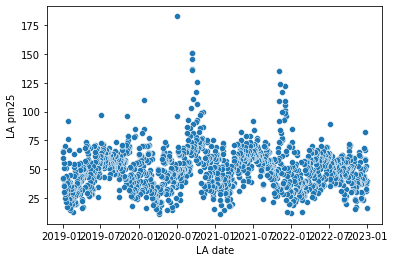

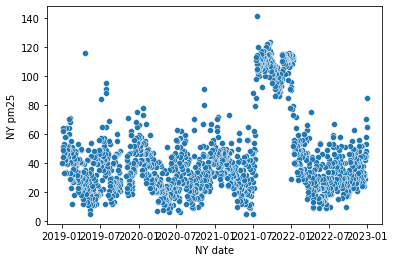

In [21]:
## Scatterplot of both LA pm25 & NY pm25 over time
sns.scatterplot(data=df, x='LA date', y='LA pm25')
plt.show()
sns.scatterplot(data=df, x='NY date', y='NY pm25')
plt.show()

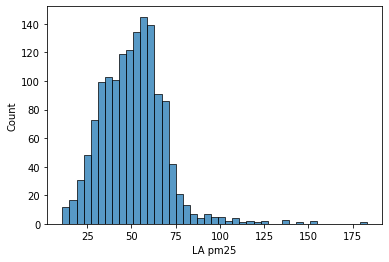

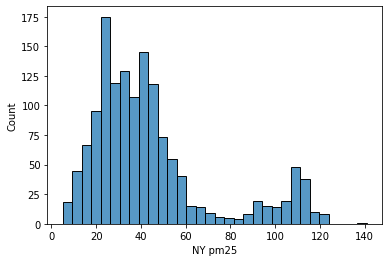

In [22]:
## Histogram
sns.histplot(df, x='LA pm25')
plt.show()
sns.histplot(df, x='NY pm25')
plt.show()

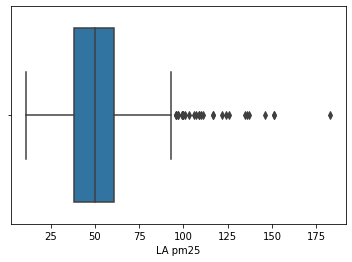

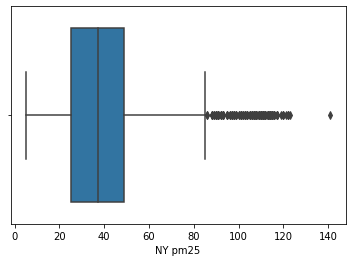

In [23]:
## Boxplot
sns.boxplot(data=df, x='LA pm25')
plt.show()
sns.boxplot(data=df, x='NY pm25')
plt.show()

### Data Visualization Description
- From the initial assessment, on average New York has lower levels of PM25 compared to Los Angeles
- However New York has a higher frequency of high-levels PM25 in the period of end 2021 - beginning 2022, as seen in the scatterplot and the outliers in the boxplot. Where Los Angeles has relatively stable levels of PM25 over time. 